In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns

from scipy.integrate import quad
from scipy.fft import fft, fftfreq

In [2]:
sns.set()
warnings.filterwarnings("ignore")

In [3]:
# Volume of the condensed gas
omega = 16.2**(15)
# We assume that the mass equals 1.
m = 1
# The number of condensed atoms.
N_0 = 10**(18)
# s-wave scattering length a_s
a_s = 0.1*(N_0/omega)**(-1/3)
# Soft-core radius
R = 15
# the strength of the dressed interaction potential C_0
C_0 = 10**5

### Plots of soft-core interaction with respect to distance and momentum.

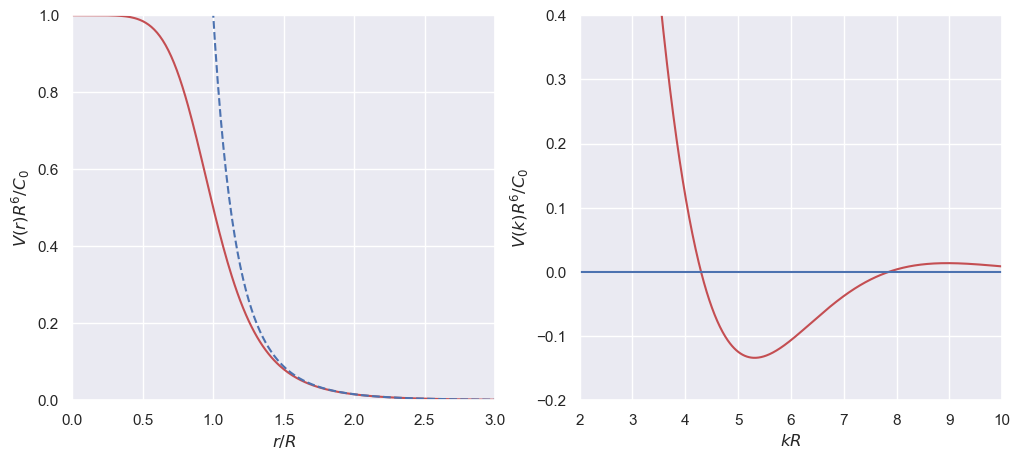

In [4]:
# Interaction potential w.r.t distance
def V_k_truncated(x):
    return (2*(np.pi**2)*np.exp(-x/2))/(3*x)*(np.exp(-x/2)-2*np.sin(np.pi/6-np.sqrt(3)*x/2))

# Interaction potential w.r.t momentum
def V_r_truncated(x):
    return 1/(1+x**6)

x = np.linspace(0.001, 10, 1000)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.plot(x, V_r_truncated(x), color='r')
ax1.plot(x, 1/x**6, '--')
ax1.axis([0, 3, 0, 1])
ax1.set_ylabel('$V(r)R^6/C_0$')
ax1.set_xlabel('$r/R$')
ax2 = fig.add_subplot(122)
ax2.plot(x, V_k_truncated(x), color='r')
ax2.axis([2, 10, -0.2, 0.4])
ax2.axhline(y=0)
ax2.set_ylabel('$V(k)R^6/C_0$')
ax2.set_xlabel('$kR$')
plt.show()

### Functional realizations of static cases

In [5]:
# Stationary dispersion relation with inpus as the momentum.
def stationary_dispersion(k, alpha):
    # the short-range contact interaction
    g_0 = 4*np.pi*a_s/m
    # the Fourier transformation of the atomic interaction g
    f_k = (2*(np.pi**2)*np.exp(-k*R/2))/(3*k*R)*(np.exp(-k*R/2)-2*np.sin(np.pi/6-np.sqrt(3)*k*R/2))
    g_k = g_0*(1+alpha*f_k)
    # the kinetic energy
    epsilon_k = k**2/(2*m)
    # the density of the condensate
    n_0 = N_0/omega
    # the dispersion relation
    E_k = np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0*(1+alpha*f_k)))/(g_0*n_0)
    return E_k

# Get analytic data of critical alpha of roton
def analytical_critical_alpha_r(R):
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    numerator = 5*np.exp(5*np.pi/3)*(36*(R**2)+25*(np.pi**2))
    determinator = 72*np.pi*(R**2)*(2*np.exp(5*np.pi/6)*np.sin(np.pi/6-5*np.pi/(2*np.sqrt(3)))-1)
    return numerator/(determinator)

# Get numerical data of critical alpha of roton at different soft-core radius.
def numerical_critical_alpha_r(x):
    f_k = (2*(np.pi**2)*np.exp(-(5*np.pi/(3*x))*x/2))/(3*(5*np.pi/(3*x))*x)*(np.exp(-(5*np.pi/(3*x))*x/2)-2*np.sin(np.pi/6-np.sqrt(3)*(5*np.pi/(3*x))*x/2))
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    return (-25*np.pi**2/(36*(x**2))-1)*(1/f_k)

# Get analytical roton energy at k_r at different soft-core interaction strength alpha.
def analytical_roton_energy(alpha):
    f_k = (2*(np.pi**2)*np.exp(-(5*np.pi/(3*R))*R/2))/(3*(5*np.pi/(3*R))*R)*(np.exp(-(5*np.pi/(3*R))*R/2)-2*np.sin(np.pi/6-np.sqrt(3)*(5*np.pi/(3*R))*R/2))
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    epsilon_k = (5*np.pi)**2/(3*R)**2*(1/2*m)
    return np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0*(1+alpha*f_k)))/(g_0*n_0)

# Get numerical roton energy at k_r at different soft-core interaction strength alpha.
def numerical_roton_energy(alpha_lst):
    k_lst = np.linspace(0.01, 0.8, len(alpha_lst))
    energy_lst = [[stationary_dispersion(k, alpha) for k in k_lst] for alpha in alpha_lst]
    for i in range(len(energy_lst)):
        energy_lst[i] = np.min(energy_lst[i][15:])
    return energy_lst

# Get analytical maxon energy at k_m at different soft-core interaction strength alpha.
def analytical_maxon_energy(alpha):
    f_k = (2*(np.pi**2)*np.exp(-(5*np.pi/(6*R))*R/2))/(3*(5*np.pi/(6*R))*R)*(np.exp(-(5*np.pi/(6*R))*R/2)-2*np.sin(np.pi/6-np.sqrt(3)*(5*np.pi/(6*R))*R/2))
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    epsilon_k = (5*np.pi)**2/(6*R)**2*(1/2*m)
    return np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0*(1+alpha*f_k)))/(g_0*n_0)

# Get numerical maxon energy at k_m at different soft-core interaction strength alpha.
def numerical_maxon_energy(alpha_lst):
    k_lst = np.linspace(0.01, 0.8, len(alpha_lst))
    energy_lst = [[stationary_dispersion(k, alpha) for k in k_lst] for alpha in alpha_lst]
    for i in range(len(energy_lst)):
        energy_lst[i] = np.max(energy_lst[i][0:10])
    return energy_lst
    

### Plots of static cases
In a), we notice that as the energy becomes complex the soft-core interaction strength increases.
Hence, the whole system becomes unstable.\
In b), we notice that the analytical expression of the critical strength of soft-core interaction for roton to be
complex meets perfectly with the numerical results.\
In c), we notice that the roton energy decreases as soft-core interaction strength increases.\
In d), we notice that the maxon energy increases as soft-core interaction strength increases.

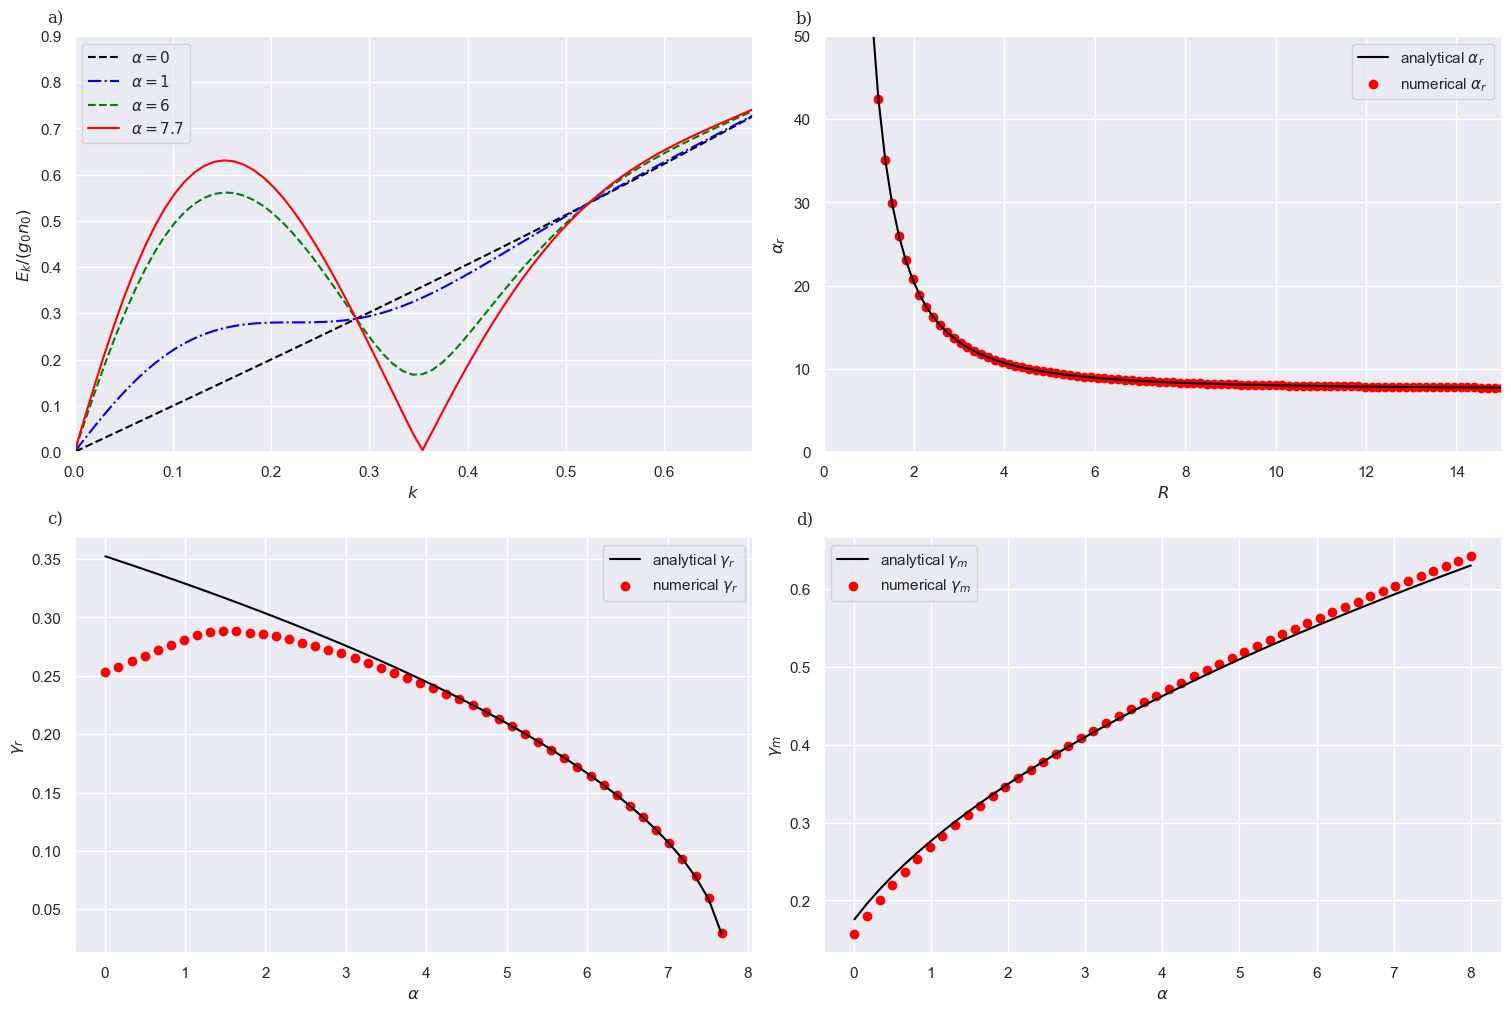

In [6]:
fig, axs = plt.subplot_mosaic([['a)','b)'], ['c)', 'd)']],
                              constrained_layout=True, figsize=(15, 10))
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
    
x = np.linspace(0.001,1,100)
axs['a)'].plot(x,stationary_dispersion(x, 0), '--', color='black', label=r'$\alpha=0$')
axs['a)'].plot(x,stationary_dispersion(x, 1), '-.', color='blue', label=r'$\alpha=1$')
axs['a)'].plot(x,stationary_dispersion(x, 6), '--', color='green', label=r'$\alpha=6$')
axs['a)'].plot(x,stationary_dispersion(x, 7.7), color='red', label=r'$\alpha=7.7$')
axs['a)'].set_ylabel(r'$E_k/(g_0 n_0)$')
axs['a)'].set_xlabel(r'$k$')
axs['a)'].axis([0, 0.69, 0, 0.9])
axs['a)'].legend()

R_long = np.linspace(0, 15, 100)
axs['b)'].plot(R_long, analytical_critical_alpha_r(R_long), color='black', label=r'analytical $\alpha_r$')
axs['b)'].scatter(R_long, numerical_critical_alpha_r(R_long), color='red', label=r'numerical $\alpha_r$')
axs['b)'].set_xlabel('$R$')
axs['b)'].set_ylabel(r'$\alpha_r$')
axs['b)'].axis([0,15, 0, 50])
axs['b)'].legend()

alpha_long = np.linspace(0.01, 8, 50)
axs['c)'].plot(alpha_long, analytical_roton_energy(alpha_long), color='black', label=r'analytical $\gamma_r$')
axs['c)'].scatter(alpha_long, numerical_roton_energy(alpha_long), color='red', label=r'numerical $\gamma_r$')
axs['c)'].set_xlabel(r'$\alpha$')
axs['c)'].set_ylabel(r'$\gamma_r$')
axs['c)'].legend()

axs['d)'].plot(alpha_long, analytical_maxon_energy(alpha_long), color='black', label=r'analytical $\gamma_m$')
axs['d)'].scatter(alpha_long, numerical_maxon_energy(alpha_long), color='red', label=r'numerical $\gamma_m$')
axs['d)'].set_xlabel(r'$\alpha$')
axs['d)'].set_ylabel(r'$\gamma_m$')
axs['d)'].legend()
plt.show()

### Functional realizations of dynamic cases
Notice here that in this paper people only consider weak quantum depletion, which means that there is little difference comparing to static case.

In [7]:
# This is basically stationary dispersion energy with alpha fixed at different soft-core radius.
def stationary_dispersion_modified(k, alpha, radius):
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    f_k = (2*(np.pi**2)*np.exp(-k*radius/2))/(3*k*radius)*(np.exp(-k*radius/2)-2*np.sin(np.pi/6-np.sqrt(3)*k*radius/2))
    g_k = g_0*(1+alpha*f_k)
    epsilon_k = k**2/(2*m)
    E_k = np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0*(1+alpha*f_k)))/(g_0*n_0)
    return E_k

# The functional realizations of momentum distribution.
def n_k(k, tau, alpha, radius):
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    epsilon_k = k**2/(2*m)
    if tau == 0:
        E_k0 = np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0))/(g_0*n_0)
        return (1/2)*((epsilon_k+g_0*n_0)/E_k0-1)*k**2
    else:
        f_k = (2*(np.pi**2)*np.exp(-k*radius/2))/(3*k*radius)*(np.exp(-k*radius/2)-2*np.sin(np.pi/6-np.sqrt(3)*k*radius/2))
        g_k = g_0*(1+alpha*f_k)
        E_k0 = np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0))/(g_0*n_0)
        E_k = np.sqrt(epsilon_k*(epsilon_k+2*g_0*n_0*(1+alpha*f_k)))/(g_0*n_0)
        return ((1/2)*((epsilon_k+g_0*n_0)/E_k0-1)+g_k*n_0*(g_k*n_0-g_0*n_0)*(epsilon_k*(1-np.cos(2*E_k*(tau))))/(2*E_k**2*E_k0))*k**2

# The functional realization of quantum depletion in time space.
def n_d(tau, alpha, radius, stronger_alpha):
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    if stronger_alpha == False:
        if tau ==0 or alpha == 0:
            def _integrand(k):
                return (1/(2*np.pi**2*n_0))*n_k(k, tau, alpha, radius)
            return quad(_integrand, 0, 1)[0]

        else:
            def _integrand(k):
                return n_k(k, tau, alpha, radius)
            return quad(_integrand, 0, 1)[0]/(2*np.pi**2*n_0)
    else:
        if tau ==0 or alpha == 0:
            def _integrand(k):
                return (1/(2*np.pi**2*n_0))*n_k(k, tau, alpha, radius)
            return quad(_integrand, 0, 1)[0]

        else:
            def _integrand(k):
                return n_k(k, tau, alpha, radius)
            return quad(_integrand, 0, 0.527)[0]/(2*np.pi**2*n_0)
        
# The Fourier transformation of quantum depletion in frequency space.
def fft_n_d(tau, alpha, radius, stronger_alpha):
    '''
    Notice here that tau should be a list unlike in the case of n_d.
    '''
    g_0 = 4*np.pi*a_s/m
    n_0 = N_0/omega
    if stronger_alpha == False:
        n_d_lst = [n_d(t, alpha, radius, stronger_alpha) for t in tau]
        n_df = fft(n_d_lst)
        xf = fftfreq(len(n_d_lst),d=0.1)
        return xf, n_df
    else:
        n_d_lst = [n_d(t, alpha, radius, stronger_alpha) for t in tau]
        n_df = fft(n_d_lst)
        xf = fftfreq(len(n_d_lst),d=0.1)
        return (xf, n_df)
        
        

### Plots of dynamic cases
In a), we notice that the maxon energies decrease as soft-core interaction radius $R$ increases.\
In b), the soft-core interaction strength $\alpha$ is fixed to be 4.\
In c), we plot the quantum depletion w.r.t time. Notice here that the equation for $n_k(\tau)k^2$ doesn't converge w.r.t $k$. Only way to make the integral to converge is to make a cut-off in $k$ when doing the integral.\
In e), the soft-core radius $R$ is fixed to be 10. Like in the static case, when $\alpha$ approaching the critical value, the roton energy becomes complex.\
In f), the soft-core radius $R$ is fixed to be 10. We notice here that when $\alpha$ approaching the critical alpha for roton $\alpha_r$ (which is numerically equal to 8 in our case), there is a significant peak at around $k_r$ denoting roton excitation.\
In g), like in c), in order to plot quantum depletion at critical $\alpha_r$, we have to do a cut-off when doing integration to get $n_d(\tau)$. We notice that when $\alpha$ approaching critical value, the roton mode comes into the play and got excited causing a slow oscilation of the general oscilation pattern.\
In h), it becomes obvious in freqency space that the slow oscillation causing a peak corresponding to roton mode. This is not shown in d) when the interaction st 

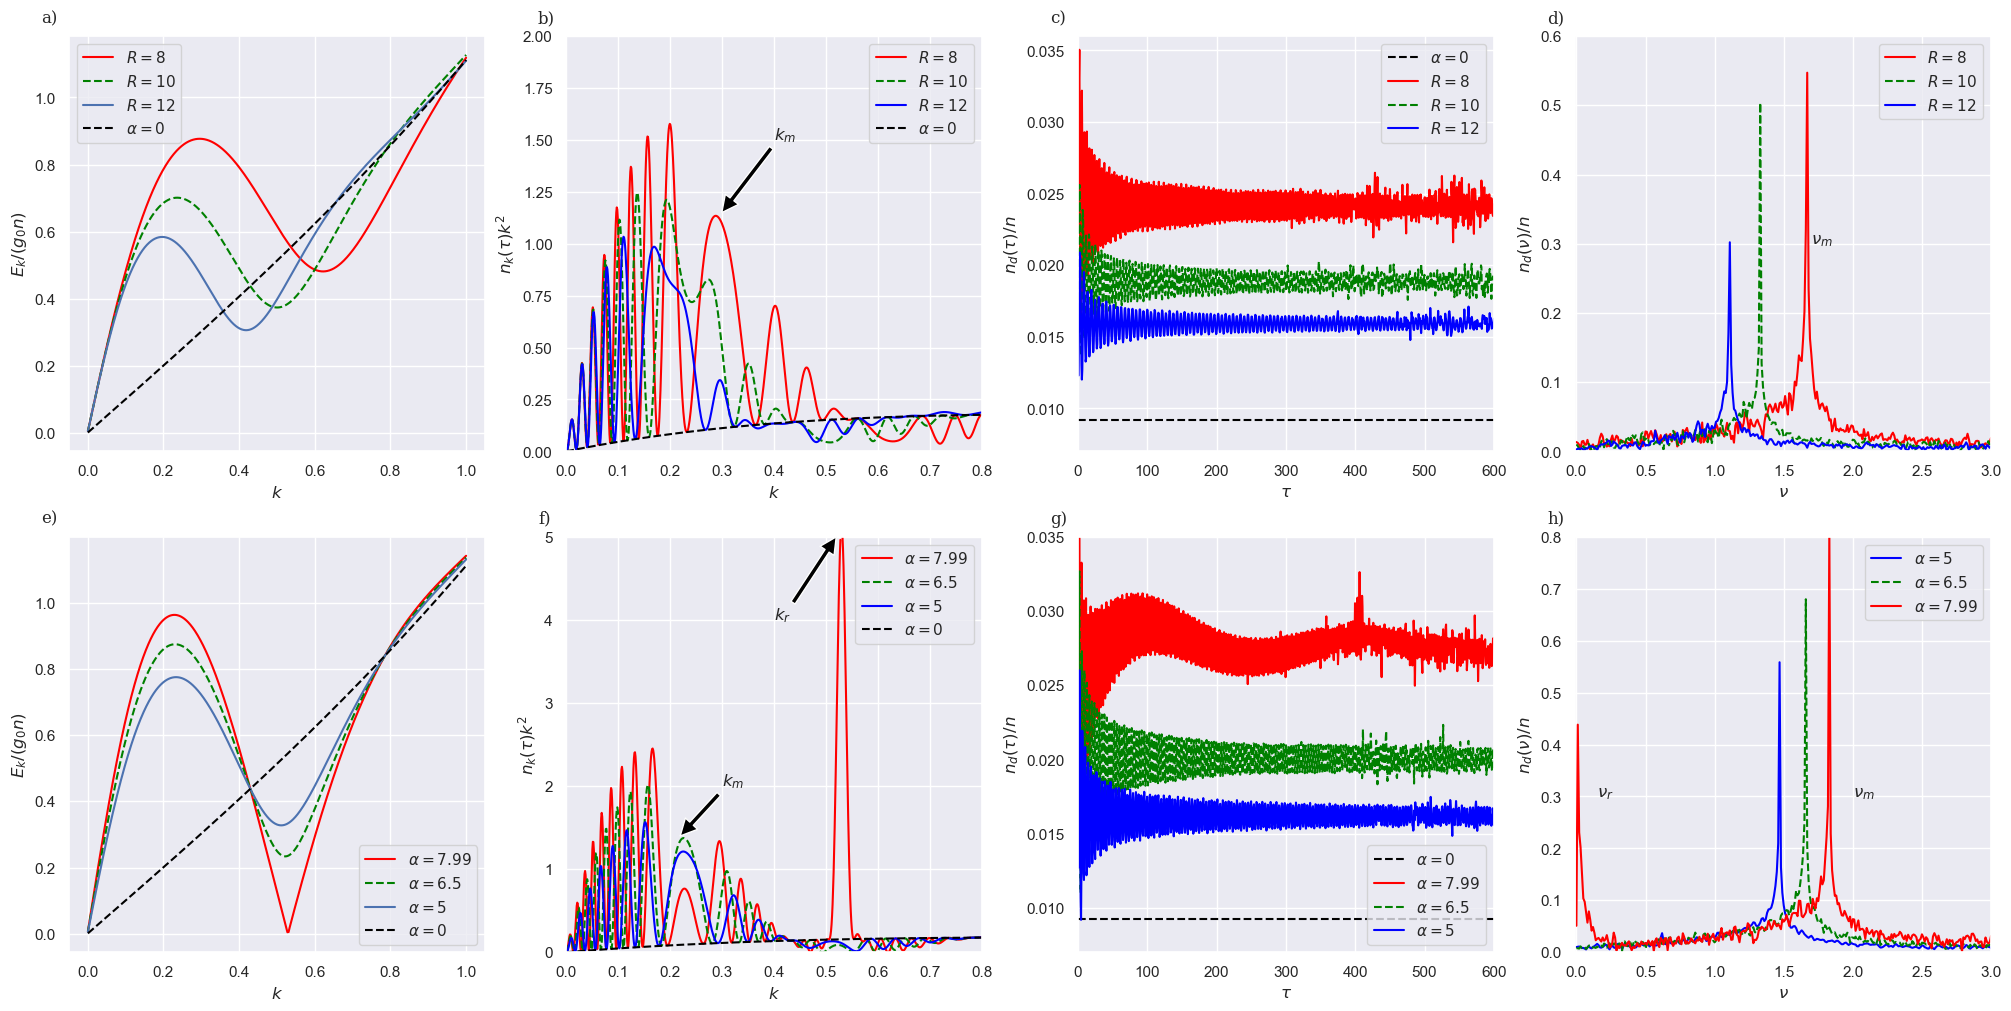

In [10]:
fig, axs = plt.subplot_mosaic([['a)','b)', 'c)', 'd)'], ['e)', 'f)', 'g)', 'h)']],
                              constrained_layout=True, figsize=(20, 10))
for label, ax in axs.items():
    # label physical distance to the left and up:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')

x = np.linspace(0.001,1,1000)
axs['a)'].plot(x, stationary_dispersion_modified(x, 4, 8), color='red', label='$R=8$')
axs['a)'].plot(x, stationary_dispersion_modified(x, 4, 10), '--', color='green', label='$R=10$')
axs['a)'].plot(x, stationary_dispersion_modified(x, 4, 12), label='$R=12$')
axs['a)'].plot(x, stationary_dispersion_modified(x, 0, 12), '--', color='black', label=r'$\alpha=0$')
axs['a)'].set_xlabel('$k$')
axs['a)'].set_ylabel(r'$E_k/(g_0 n)$')
axs['a)'].legend()

axs['b)'].plot(x, n_k(x,30,4,8), color='red', label='$R=8$')
axs['b)'].plot(x, n_k(x,30,4,10), '--', color='green', label='$R=10$')
axs['b)'].plot(x, n_k(x,30,4,12), color='blue', label='$R=12$')
axs['b)'].plot(x, n_k(x, 0, 0, 0), '--', color='black', label=r'$\alpha=0$')
axs['b)'].set_xlabel('$k$')
axs['b)'].set_ylabel(r'$n_{k}(\tau)k^2$')
axs['b)'].axis([0,0.8,0,2])
axs['b)'].annotate(r'$k_m$', arrowprops=dict(facecolor='black',width=3.5), xy=(0.3,1.15), xytext=(0.4,1.50))
axs['b)'].legend()

time = np.linspace(1, 600, 1000)
axs['c)'].axhline(n_d(0,0,0,False),xmin=0, xmax=300, linestyle='--', color='black', label=r'$\alpha=0$')
n_d_lst = [n_d(t,4,8,False) for t in time]
n_d1_lst = [n_d(t,4,10,False) for t in time]
n_d2_lst = [n_d(t,4,12,False) for t in time]
axs['c)'].plot(time, n_d_lst, color='red', label=r'$R=8$')
axs['c)'].plot(time, n_d1_lst, '--', color='green', label=r'$R=10$')
axs['c)'].plot(time, n_d2_lst, color='blue', label=r'$R=12$')
axs['c)'].set_xlabel(r'$\tau$')
axs['c)'].set_ylabel(r'$n_d(\tau)/n$')
axs['c)'].axis([0, 600, 0.007, 0.036])
axs['c)'].legend()

time11 = np.linspace(0.01, 600, 1000)
axs['d)'].plot(fft_n_d(time11, 4, 8, False)[0][0:500], np.abs(fft_n_d(time11, 4, 8, False)[1])[1:501], color='red',label=r'$R=8$')
axs['d)'].plot(fft_n_d(time11, 4, 10, False)[0][0:500], np.abs(fft_n_d(time11, 4, 10, False)[1])[1:501], '--', color='green',label=r'$R=10$')
axs['d)'].plot(fft_n_d(time11, 4, 12, False)[0][0:500], np.abs(fft_n_d(time11, 4, 12, False)[1])[1:501], color='blue',label=r'$R=12$')
axs['d)'].annotate(r'$\nu_m$', xy=(1.7,0.3))
axs['d)'].set_xlabel(r'$\nu$')
axs['d)'].set_ylabel(r'$n_{d}(\nu)/n$')
axs['d)'].axis([-0.01,3,0,0.6])
axs['d)'].legend()

axs['e)'].plot(x, stationary_dispersion_modified(x, 7.99, 10), color='red', label=r'$\alpha=7.99$')
axs['e)'].plot(x, stationary_dispersion_modified(x, 6.5, 10), '--', color='green', label=r'$\alpha=6.5$')
axs['e)'].plot(x, stationary_dispersion_modified(x, 5, 10), label=r'$\alpha=5$')
axs['e)'].plot(x, stationary_dispersion_modified(x, 0, 10), '--', color='black', label=r'$\alpha=0$')
axs['e)'].set_xlabel('$k$')
axs['e)'].set_ylabel(r'$E_k/(g_0 n)$')
axs['e)'].legend()

axs['f)'].plot(x, n_k(x, 30, 7.99, 10), color='red', label=r'$\alpha=7.99$')
axs['f)'].plot(x, n_k(x,30,6.5,10), '--', color='green', label=r'$\alpha=6.5$')
axs['f)'].plot(x, n_k(x,30,5,10), color='blue', label=r'$\alpha=5$')
axs['f)'].plot(x, n_k(x, 0, 0, 0), '--', color='black', label=r'$\alpha=0$')
axs['f)'].set_xlabel('$k$')
axs['f)'].set_ylabel(r'$n_{k}(\tau)k^2$')
axs['f)'].annotate(r'$k_m$', arrowprops=dict(facecolor='black',width=3.5),xy=(0.22,1.4),xytext=(0.3,2))
axs['f)'].annotate(r'$k_r$', arrowprops=dict(facecolor='black',width=3.5),xy=(0.52,5),xytext=(0.4,4))
axs['f)'].axis([0,0.8,0,5])
axs['f)'].legend()

axs['g)'].axhline(n_d(0,0,0,True),xmin=0, xmax=300, linestyle='--', color='black', label=r'$\alpha=0$')
n_d_lst_stronger = [n_d(t,7.99,10,True) for t in time]
n_d1_lst_stronger = [n_d(t,6.5,10,True) for t in time]
n_d2_lst_stronger = [n_d(t,5,10,True) for t in time]
axs['g)'].plot(time, n_d_lst_stronger, color='red', label=r'$\alpha=7.99$')
axs['g)'].plot(time, n_d1_lst_stronger, '--', color='green', label=r'$\alpha=6.5$')
axs['g)'].plot(time, n_d2_lst_stronger, color='blue', label=r'$\alpha=5$')
axs['g)'].set_xlabel(r'$\tau$')
axs['g)'].set_ylabel(r'$n_d(\tau)/n$')
axs['g)'].axis([0,600,0.007, 0.035])
axs['g)'].legend()

time1 = np.linspace(0.01, 600, 1000)
axs['h)'].plot(fft_n_d(time1, 5, 10, True)[0][0:500], np.abs(fft_n_d(time1, 5, 10, True)[1])[1:501], color='blue',label=r'$\alpha=5$')
axs['h)'].plot(fft_n_d(time1, 6.5, 10, True)[0][0:500], np.abs(fft_n_d(time1, 6.5, 10, True)[1])[1:501], '--', color='green',label=r'$\alpha=6.5$')
axs['h)'].plot(fft_n_d(time1, 7.99, 10, True)[0][0:500], np.abs(fft_n_d(time1, 7.99, 10, True)[1])[1:501], color='red',label=r'$\alpha=7.99$')
axs['h)'].annotate(r'$\nu_m$', xy=(2.0,0.3))
axs['h)'].annotate(r'$\nu_r$', xy=(0.15,0.3))
axs['h)'].set_xlabel(r'$\nu$')
axs['h)'].set_ylabel(r'$n_{d}(\nu)/n$')
axs['h)'].axis([-0.01,3,0,0.8])
axs['h)'].legend()
plt.show()